In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import wquantiles
import statsmodels.robust.robust_linear_model as robust
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gym = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/gym_members_exercise_tracking.csv')
gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Mean
* The sum of all values divided by the number of all values
$$
\text{Set of numbers: } \{3, 5, 1, 2\}
$$
$$
\text{The mean is } \frac{3 + 5 + 1 + 2}{4} = \frac{11}{4} = 2.75
$$
Mean formula
$$
\text{Mean} = \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
$$
$$
N = \text{Total number of records or observations}
$$

Trimmed mean
* Calculated by dropping a fixed number of sorted values at each end and then taking an average of the remaining values.
Formula
$$
\text{Trimmed mean} = \bar{x} = \frac{\sum_{i = p+1}^{n - p} x_{(i)}}{n - 2p}
$$
* Eliminates the influence of extremes values. the trimmed mean excludes the largest ans the smalled values (trim=0.1 drops 10 % from each end).

Weighted mean
* Some values are intrinsically more variable than others, and highly variable observations are given a lower weight.
* The data collected does not equally represent the different groups that we are interested in measuring.
Formula
$$
\bar{x}_w = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}
$$

In [3]:
gym.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [4]:
mean = gym['Age'].mean()
trim_mean = stats.trim_mean(gym['Age'], 0.1)
median = gym['Age'].median()
print(mean)
print(trim_mean)
print(median)

38.68345323741007
38.79204107830552
40.0


Most of the time the mean is bigger than the trimmed mean, which is bigger than the median.

In [5]:
weighted_mean = np.average(gym['Height (m)'], weights=gym['Weight (kg)'])
weighted_median = wquantiles.median(gym['Height (m)'], weights=gym['Weight (kg)'])
print(weighted_mean)
print(weighted_median)

1.7359640331419441
1.73


Deviations
* The difference between the observed values and the estimate of location. (errors, residuals)
* For a set of numbers
$$
\{1, 4, 4\}
$$
* the mean is 3 and the median is 4.
* the deviations from the mean are the differences:
$$
1 - 3 = -2, \quad 4 - 3 = 1, \quad 4 - 3 = 1.
$$

Mean absolute deviation
* The mean of the absolute values of the deviations from the mean. (l1-norm, Manhattan norm)
* Take the absolute values of the deviations
$$
\{2, 1, 1\}
$$
* their average is
$$
\frac{2 + 1 + 1}{3} = 1.33\
$$
* Formula
$$
\text{Mean absolute deviation} = \frac{\sum_{i=1}^{n} |x_i - \bar{x}|}{n}
$$


Variance
* The sum of squared deviations from the mean divided by the number of observations minus 1. (mean-squared error)
* Formula
$$
\text{Variance} = s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
$$

Standard deviation
* The square root of the variance.
* Formula
$$
s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}
$$
* The standard deviation is the same scale as the original data.

Median absolute deviation from the median
* The median of the absolute values of the deviations from the median.
* Formula
$$
\text{Median absolute deviation} = \text{median}(|x_1 - \text{median}, |x_2 - \text{median}, \ldots, |x_n - \text{median}|)
$$
* The MAD is not influenced by extreme values.

Interquartile range
* The difference between the 75th percentile and the 25th percentile. (IQR)
* Take this set of numbers
$$
\{3,1,5,3,6,7,2,9\}
$$
* We sort them
$$
\{1,2,3,3,5,6,7,9\}
$$
* The 25th percentile is at 2.5 and the 75th percentile is at 6.5. So, the IQR is 6.5 - 2.5 = 4.

Range
* The difference between the largest and the smallest value in a data set.

Order statistics
* Metrics based on thw data values sorted from smallest to biggest. (ranks)

Percentile
* The value such P percent of the values take on this value or less and (100 - P) percent take on this value or more. (quantile)

In [6]:
standard_deviation = gym['Weight (kg)'].std()
iqr = gym['Weight (kg)'].quantile(0.75) - gym['Weight (kg)'].quantile(0.25)
mad = robust.scale.mad(gym['Weight (kg)'])
print(standard_deviation)
print(iqr)
print(mad)

21.20750049840716
27.9
19.866869727975075


* the standard deviation is almost twice as large as the MAD due to the influence of the extreme values.

Boxplot
* A quick way to visualize the distribution of the data.


In [7]:
percentiles = gym['BMI'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
percentiles

0.05    15.448
0.25    20.110
0.50    24.160
0.75    28.560
0.95    37.542
Name: BMI, dtype: float64

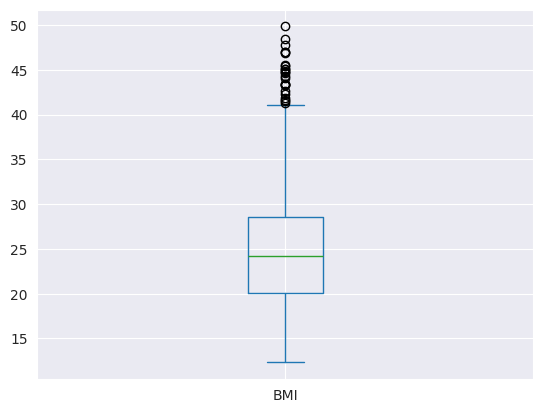

In [8]:
ax = gym['BMI'].plot(kind='box')

* The data outside of the whiskers is considered as outliers.

Frequency Table
* A tally of the count of numeric data values that fall into a set of intervals(bins).

In [9]:
frequency_table = pd.cut(gym['Workout_Frequency (days/week)'], 4)
frequency_table.value_counts()

Workout_Frequency (days/week)
(2.75, 3.5]      368
(3.5, 4.25]      306
(1.997, 2.75]    197
(4.25, 5.0]      102
Name: count, dtype: int64

Histograms
* A graphical representation of the frequency table.

<Axes: ylabel='Frequency'>

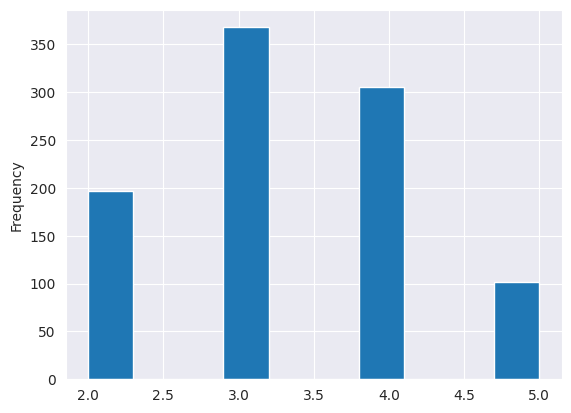

In [10]:
gym['Workout_Frequency (days/week)'].plot(kind='hist')

Density plot
* A smoothed version of the histogram, often based on a kernel density estimate.

<Axes: ylabel='Density'>

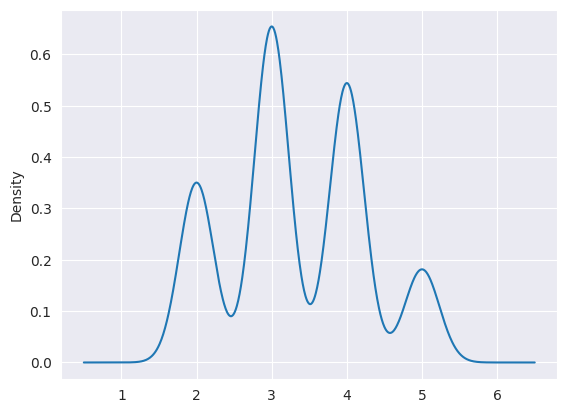

In [11]:
gym['Workout_Frequency (days/week)'].plot(kind='kde')

Mode
* The most frequent value in a data set.

Expected value
* When the categories can be associated with a numeric value, given an average value based on a category's probability.
* Multiply each possible value by its probability and add up the results.
* Formula
$$
\text{Expected value} = E(x) = \sum_{i=1}^{n} x_i p_i
$$
* It is a form of weighted mean, it adds the expectations and probability weights.

* In a bar chart the x-axis represent different categories while a histogram the x-axis represents values of a single variable on a numeric scale.

Correlation coefficient
* A metric that measures the extent to which numeric variables are associated with one another ( ranges from -1 to +1).
* We multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of standard deviations.
* Formula
$$
\text{Correlation coefficient} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_x s_y}
$$
* Always lies between +1 (perfect positive correlation) and -1 (perfect negative correlation).; 0 indicates no correlation.

Correlation matrix
* A table showing correlation coefficients between variables.

<Axes: >

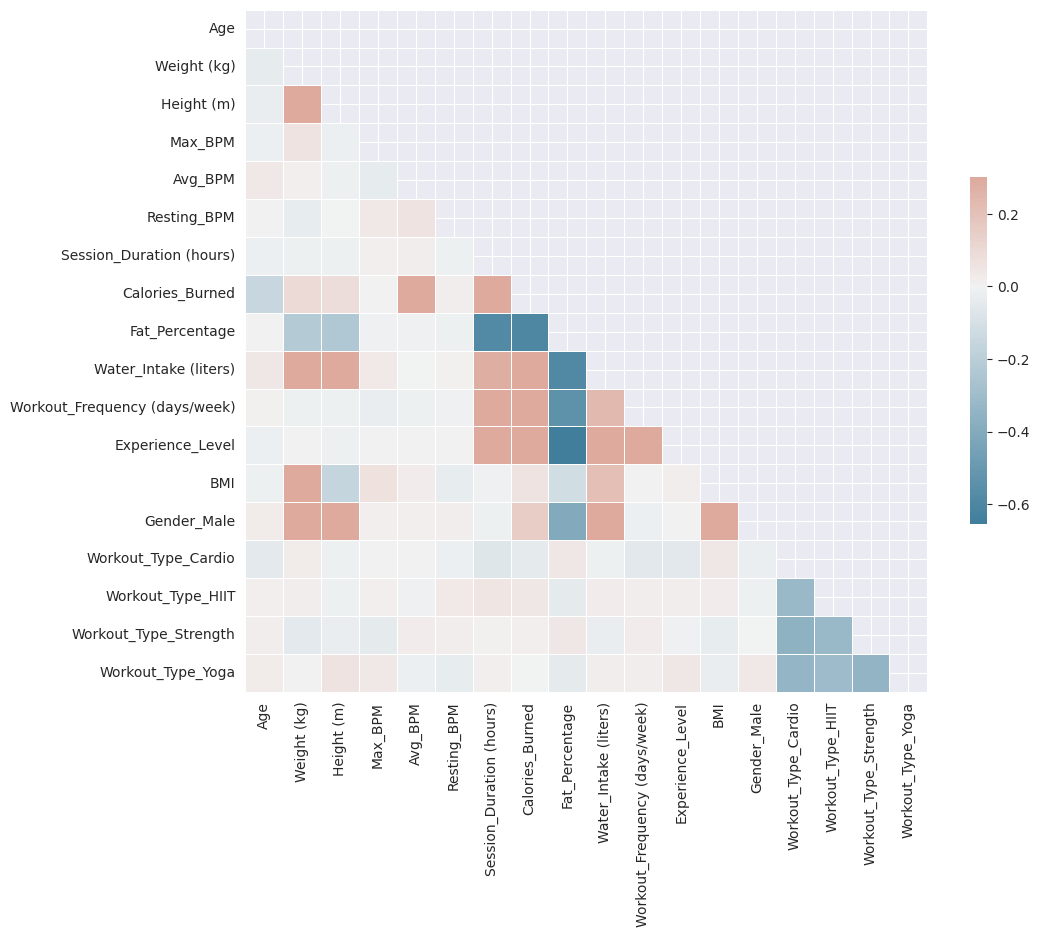

In [12]:
gym_dummy = pd.get_dummies(gym)
gym_dummy = gym_dummy.drop(['Gender_Female'], axis=1)
corr = gym_dummy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Scatterplot
* A plot of two variables showing whether they are correlated.

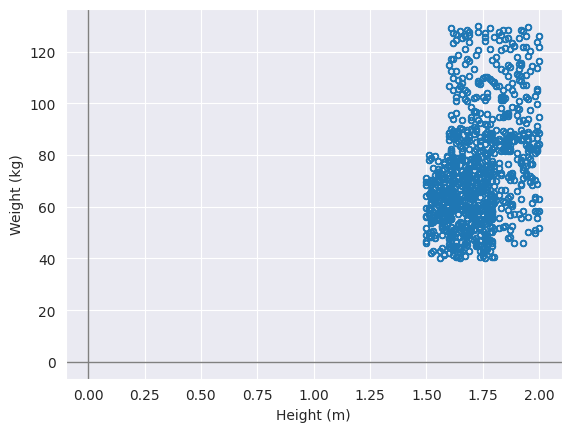

In [13]:
ax = gym.plot.scatter(x='Height (m)', y='Weight (kg)', marker='$\u25EF$')
ax.set_xlabel('Height (m)')
ax.set_ylabel('Weight (kg)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

* The scatterplot shows a positive correlation between height and weight.

Contingency table
* A tally of counts between two or more categorical variables.

In [14]:
crosstab = pd.crosstab(gym['Water_Intake (liters)'],
                       gym['Gender'],
                       margins = False)
crosstab

Gender,Female,Male
Water_Intake (liters),,
1.5,20,0
1.6,26,0
1.7,27,0
1.8,34,0
1.9,31,0
2.0,36,10
2.1,36,21
2.2,30,19
2.3,34,25


Hexagonal binning
* A plot of two variables showing whether they are correlated.

Text(0, 0.5, 'Weight (kg)')

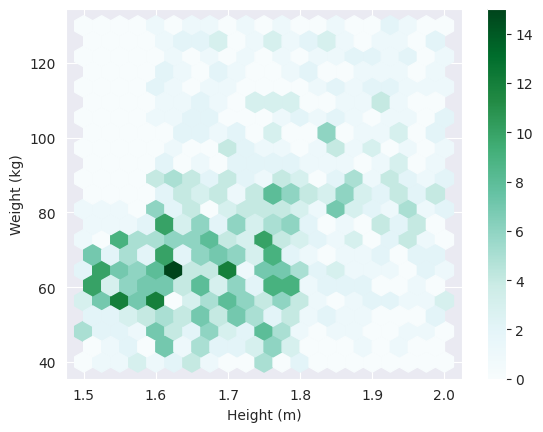

In [15]:
ax = gym.plot.hexbin(x='Height (m)', y='Weight (kg)', gridsize=20)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Weight (kg)')

Contour plot
* A plot showing the density of two variables.

Text(0, 0.5, 'Weight (kg)')

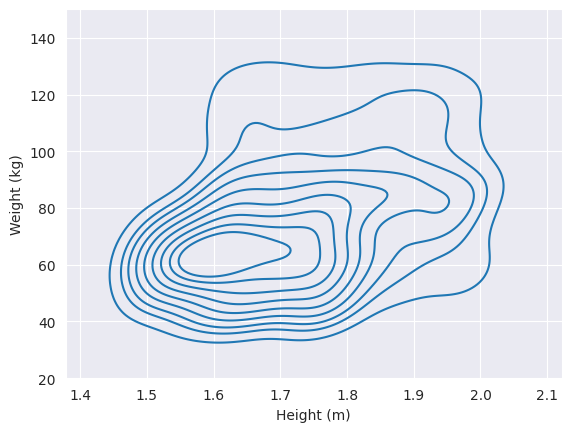

In [16]:
ax = sns.kdeplot(data=gym, x='Height (m)', y='Weight (kg)')
ax.set_xlabel('Height (m)')
ax.set_ylabel('Weight (kg)')

Violin plot
* A combination of a boxplot and a kernel density plot.

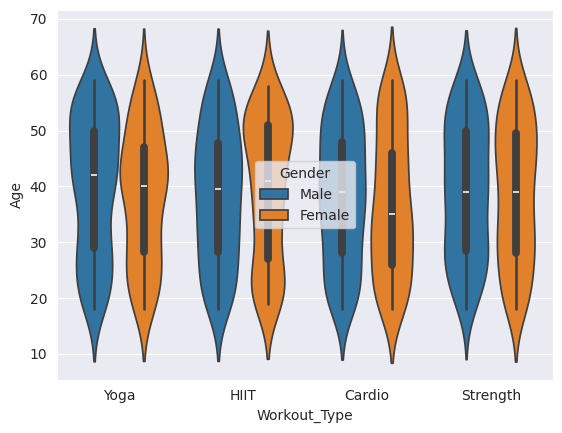

In [17]:
ax = sns.violinplot(data=gym, x='Workout_Type', y='Age', hue="Gender")

In [18]:
gym

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


Text(0.5, 0.98, 'Boxplot of Age by Workout Type')

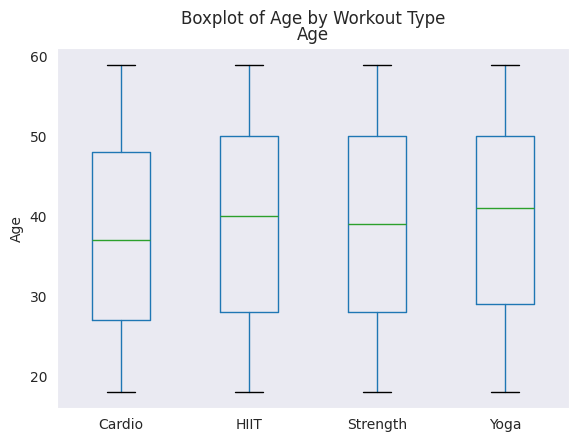

In [19]:
ax = gym.boxplot(by='Workout_Type', column='Age', grid=False)
ax.set_xlabel('')
ax.set_ylabel('Age')
plt.suptitle('Boxplot of Age by Workout Type')

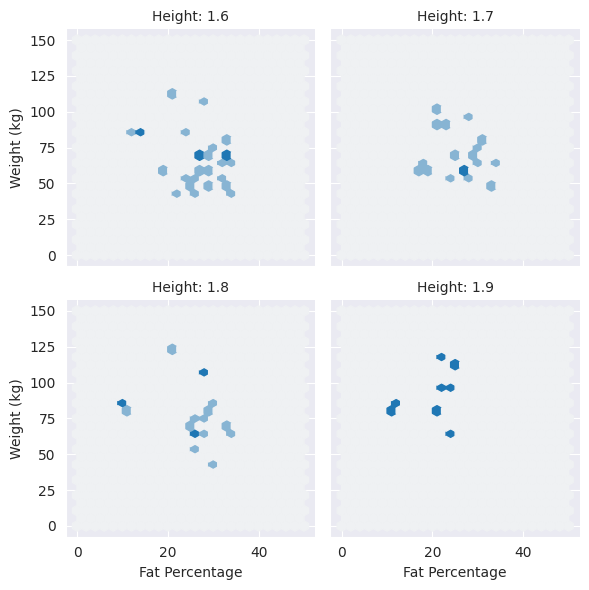

In [20]:
height = [1.6, 1.7, 1.8, 1.9]
height_zip = gym.loc[gym['Height (m)'].isin(height)]

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(height_zip, col='Height (m)', col_wrap=2)
g.map(hexbin, 'Fat_Percentage', 'Weight (kg)', extent=[0, 50, 0, 150])
g.set_axis_labels('Fat Percentage', 'Weight (kg)')
g.set_titles('Height: {col_name}')